# 12. Information Retrieval

## Instalacja bibliotek

In [ ]:
!pip install langchain==0.3.7 langchain-community==0.3.5 pypdf==5.1.0 wikipedia==1.4.0 openai==1.54.3 tiktoken==0.8.0 chromadb==0.5.18 langchain-openai==0.2.6

## Zadanie 1 - Model Przestrzeni Wektorowej

Napisz funkcję, która przyjmuje listę dokumentów i zapytanie, a zwraca listę dokumentów posortowanych według podobieństwa cosinusowego z zapytaniem.

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

def tf_idf_retrieval(documents: list[str], query: str) -> pd.DataFrame:
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(documents)
    query_vector = vectorizer.transform([query])
    cosine_similarities = cosine_similarity(query_vector, tfidf_matrix).flatten()

    similarity_df = pd.DataFrame({
    "Document": [f"Doc {i+1}" for i in range(len(documents))],
    "Cosine Similarity": cosine_similarities
    }).sort_values(by="Cosine Similarity", ascending=False)
    return similarity_df

documents = [
    "AI in healthcare improves diagnostics and patient care. AI algorithms analyze medical medical datasets efficiently",
    "AI enhances the e-commerce experience. AI systems recommend products, predict customer preferences, and increase sales. AI also personalizes online shopping",
    "Healthcare and AI are transforming diagnostics. Healthcare diagnostics benefit greatly from AI’s ability to process large datasets efficiently",
    "AI applications in healthcare include diagnostics, treatment planning, and patient monitoring. Healthcare systems increasingly rely on AI advancements",
    "AI in transportation is reshaping the future with self-driving cars, traffic optimization, and route planning. AI is making travel safer and more efficient"
]

query = "AI in healthcare diagnostics"
results = tf_idf_retrieval(documents, query)
print(results)

  Document  Cosine Similarity
3    Doc 4           0.482958
2    Doc 3           0.462498
0    Doc 1           0.406989
4    Doc 5           0.151518
1    Doc 2           0.129578


## Zadanie 2 - Normalizacja

Napisz funkcję, która normalizuje tekst (zmienia na małe litery, usuwa znaki specjalne i nadmiarowe spacje).

In [5]:
import re

def normalize(text: str) -> str:
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

text = "Information     Retrieval is... FUN!!!"
normalized_text = normalize(text)
print(normalized_text)

information retrieval is fun


## Zadanie 3 - Tokenizacja

Napisz funkcję, która tokenizuje tekst za pomocą biblioteki nltk.

In [6]:
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt_tab')

def word_tokenization(doc: str) -> list[str]:
    return word_tokenize(doc)

text = "Dr. Smith said, 'Information Retrieval is fascinating!'"
tokens = word_tokenization(text)
print(tokens)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\s30277\AppData\Roaming\nltk_data...


['Dr.', 'Smith', 'said', ',', "'Information", 'Retrieval', 'is', 'fascinating', '!', "'"]


[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


## Zadanie 4 - Usuwanie stop-words

Napisz funkcję, która usuwa stop-wordy (słowa nieinformatywne) z listy tokenów.



In [7]:
from nltk.corpus import stopwords

nltk.download('stopwords')

def remove_stop_words(tokens: list[str]) -> list[str]:
    return [word for word in tokens if word not in stopwords.words('english')]

tokens = ["this", "is", "an", "example", "of", "stop-word", "removal", "for", "information", "retrieval"]
filtered_tokens = remove_stop_words(tokens)
print(filtered_tokens)

['example', 'stop-word', 'removal', 'information', 'retrieval']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\s30277\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


## Zadanie 5 - Embeddingi Zdań (Sentence Embeddings)

Napisz funkcję, która oblicza embeddingi dla listy zdań za pomocą modelu SentenceTransformer. Zobacz jak wyglada wizualizacja tych embeddingów po zmniejszeniu liczby wymiarów.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer

def get_sentence_embeddings(sentences: list[str]) -> np.array:
    model = SentenceTransformer('all-MiniLM-L6-v2')
    return model.encode(sentences)

sentences = [
    "Information Retrieval is fascinating",
    "Retrieval systems retrieve documents",
    "I love playing football",
    "Soccer is a great sport",
    "Cooking is an enjoyable activity",
    "Baking is part of cooking",
    "A lovely day for a picnic",
    "Cats are beautiful animals"
]

sentence_embeddings = get_sentence_embeddings(sentences)
print("Embeddings Shape:", sentence_embeddings.shape)

C:\Users\s30277\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\s30277\AppData\Roaming\Python\Python312\site-packages\huggingface_hub\file_download.py:140: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\s30277\.cache\huggingface\hub\models--sentence-transformers--all-MiniLM-L6-v2. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an admi

Embeddings Shape: (8, 384)


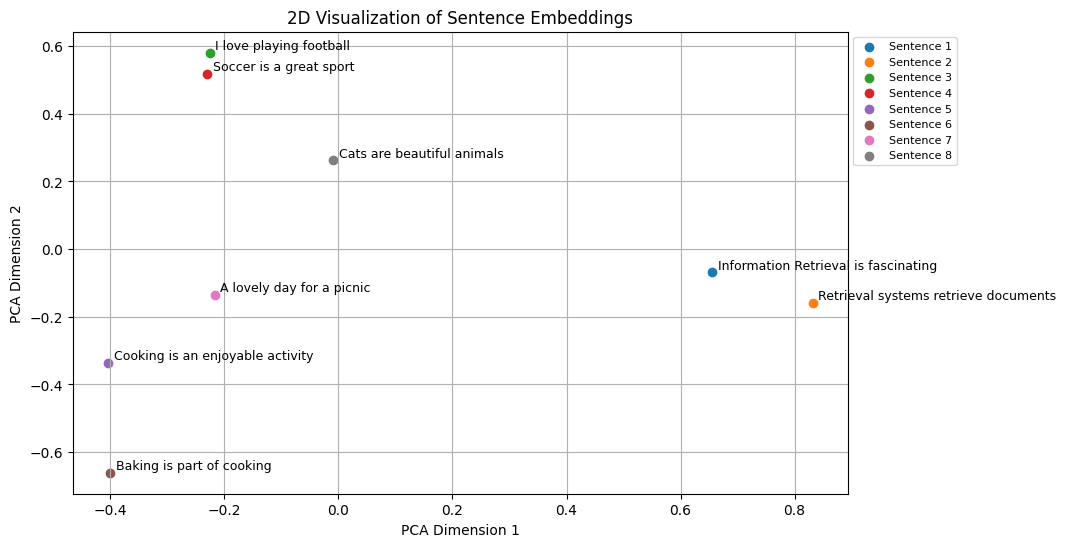

In [9]:
from sklearn.decomposition import PCA

# Reduce Dimensions to 2D
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(sentence_embeddings)

# Plot the Embeddings
plt.figure(figsize=(10, 6))
for i, sentence in enumerate(sentences):
    x, y = reduced_embeddings[i]
    plt.scatter(x, y, label=f"Sentence {i+1}")
    plt.text(x + 0.01, y + 0.01, sentence, fontsize=9)

plt.title("2D Visualization of Sentence Embeddings")
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimension 2")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=8)
plt.grid()
plt.show()

## Zadanie 6 - Wektorowa Baza Danych

Napisz dwie funkcje. Jedną która tworzy wektorową bazę danych w ChromaDB, dodaje dokumenty i drugą która przeszukuje ją na podstawie zapytania.

In [11]:
from chromadb import Client


def create_index(index_name: str, documents: list[str]) -> Client:
    chromadb_client = Client()
    index = chromadb_client.create_collection(
    name=index_name,
    metadata={"hnsw:space": "cosine"})
    index.add(documents=documents, ids=[f"{i}" for i in range(len(documents))])
    return index

def query_index(index: Client, query: str, n_results: int) -> pd.DataFrame:
    results = index.query(query_texts=[query], n_results=n_results)
    results_df = pd.DataFrame({
    "Document": results["documents"][0],
    "Distance": results["distances"][0]
})
    return results_df

documents = [
    "AI is the future of technology",
    "The world is becoming more digital",
    "Data science is the key to innovation",
    "Remote work is the new normal",
    "OpenAI provides powerful tools for developers",
    "I like to code in Python"
]

index_name = "NAI"
index = create_index(index_name, documents)
query = "What is the future of technology?"
results = query_index(index, query, n_results=3)
print(results)

C:\Users\s30277\.cache\chroma\onnx_models\all-MiniLM-L6-v2\onnx.tar.gz: 100%|██████████| 79.3M/79.3M [00:04<00:00, 18.9MiB/s]


                                Document  Distance
0         AI is the future of technology  0.268255
1     The world is becoming more digital  0.502712
2  Data science is the key to innovation  0.572976


## Zadanie 7 - Podział Tekstu (Chunking)

Napisz funkcję, która dzieli tekst na chunki o stałej długości za pomocą CharacterTextSplitter.

In [12]:
from langchain_text_splitters import CharacterTextSplitter, RecursiveCharacterTextSplitter


def chunk_text(text: str, chunk_size: int, chunk_overlap: int) -> list[str]:
    splitter = RecursiveCharacterTextSplitter(
        chunk_size=chunk_size,
        chunk_overlap=chunk_overlap
    )

    chunks = splitter.split_text(text)

    return chunks

text = "This is a sample document for text chunking. The text will be split into smaller chunks of fixed length."
text_chunks = chunk_text(text, chunk_size=30, chunk_overlap=10)
print("Chunks:")
for i, chunk in enumerate(text_chunks):
    print(f"Chunk {i+1}: {chunk}")

Chunks:
Chunk 1: This is a sample document for
Chunk 2: for text chunking. The text
Chunk 3: The text will be split into
Chunk 4: into smaller chunks of fixed
Chunk 5: of fixed length.


## Zadanie domowe - Image Embeddings

Stwórz system IR, który będzie mógł przeszukiwać tekst książki. Skorzystaj z funkcji z poprzednich zadań.

1.   *Pobierz zawartość strony internetowej.*
2.   Przetwórz tekst (normalizacja, tokenizacja).
3.   Podziel tekst na chunki o stałej długości.
4.   Stwórz bazę danych wektorową w ChromaDB i dodaj chunki.
5.   *Przeszukaj bazę danych wektorową na podstawie zapytania.*




In [35]:
import requests
from bs4 import BeautifulSoup

# Funkcja do pobierania i wyciągania tekstu ze strony
def extract_text_from_url(url: str) -> str:
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    paragraphs = soup.find_all('p')
    text = ' '.join([para.get_text() for para in paragraphs])
    return text

# Funkcja do preprocessingu tekstu
def preprocess_text(text: str) -> str:
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    text = re.sub(r"\s+", " ", text).strip() # normalizacja
    tokens = word_tokenize(text)
    text = " ".join(tokens)
    return text

def chunk_text(text: str, chunk_size: int, chunk_overlap: int) -> list[str]:
    splitter = RecursiveCharacterTextSplitter(
        chunk_size=chunk_size,
        chunk_overlap=chunk_overlap
    )

    chunks = splitter.split_text(text)

    return chunks

# URL strony z przepisami
url = "https://pl.wikipedia.org/wiki/Karma_dla_zwierz%C4%85t_domowych"
text = extract_text_from_url(url)

def create_index(index_name: str) -> Client:
    chromadb_client = Client()
    if index_name in [i.name for i in chromadb_client.list_collections()]:
        chromadb_client.delete_collection(index_name)
    index = chromadb_client.create_collection(
    name=index_name,
    metadata={"hnsw:space": "cosine"})
    return index

def query_index(index: Client, query: str, n_results: int) -> pd.DataFrame:
    results = index.query(query_texts=[query], n_results=n_results)
    results_df = pd.DataFrame({
    "Document": results["documents"][0],
    "Distance": results["distances"][0]
})
    return results_df

pr_text=preprocess_text(text)
ch_text=chunk_text(pr_text, chunk_size=250, chunk_overlap=100)
text_embeddings = get_sentence_embeddings(ch_text)

index_name = "NAI"
index=create_index(index_name=index_name)

index.add(
    embeddings=text_embeddings,
    documents=ch_text,
    ids=[f"if_{i+1}" for i in range(len(ch_text))]
)

# Przeszukiwanie indeksu
query = "Dla kogo przeznaczony to pokarm?"
results = query_index(index, query, n_results=10)
#query_embedding = get_sentence_embeddings([query])

results_df = pd.DataFrame({
    "Document": results["documents"][0],
    "Distance": results["distances"][0]
})

# Wyświetlanie wyników
for doc in results["Document"][0]:
    print(doc, end="")
    print("-"*50)


InvalidDimensionException: Embedding dimension 384 does not match collection dimensionality 768

## Zadanie dodatkowe

Napisz dwie funkcje: jedna oblicza embeddingi obrazów za pomocą modelu CLIP, druga znajduje obraz najbardziej podobny do zapytania.

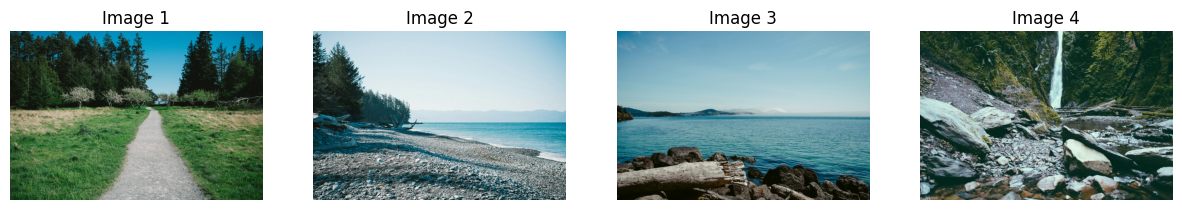

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

Najbardziej podobny obraz: Image 1


In [4]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import requests

# Przykładowe obrazy
images = [
    "https://images.unsplash.com/2/03.jpg",
    "https://images.unsplash.com/2/01.jpg",
    "https://images.unsplash.com/2/06.jpg",
    "https://images.unsplash.com/2/09.jpg"
]

# query = "Forest"
# query = "Beach"
query = "Path"

# Funkcja do pobierania obrazów
def download_image(url: str) -> Image:
    return Image.open(requests.get(url, stream=True).raw)

# Wyświetlanie obrazów
fig, axs = plt.subplots(1, len(images), figsize=(15, 5))
for i, image_url in enumerate(images):
    image = download_image(image_url)
    axs[i].imshow(image)
    axs[i].axis("off")
    axs[i].set_title(f"Image {i+1}")
plt.show()

# Funkcja do obliczania embeddingów obrazów
def get_clip_image_embeddings(images: list[str]) -> np.array:
    # Twoje rozwiązanie
    pass

# Funkcja do obliczania embeddingu zapytania
def get_clip_text_embeddings(text: str) -> np.array:
    # Twoje rozwiązanie
    pass

# Funkcja do znalezienia najbardziej podobnego obrazu
def find_most_similar_image(image_embeddings: np.array, query_embedding: np.array) -> int:
    # Twoje rozwiązanie
    pass

# Obliczanie embeddingów obrazów i zapytania
image_embeddings = get_clip_image_embeddings(images)
query_embedding = get_clip_text_embeddings(query)

# Znalezienie najbardziej podobnego obrazu
most_similar_idx = find_most_similar_image(image_embeddings, query_embedding)
print(f"Najbardziej podobny obraz: Image {most_similar_idx + 1}")